<a href="https://colab.research.google.com/github/nit29sin/Facial-Emotion-Detection/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Sep  6 04:20:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers

In [ ]:
#VggNet from paper "Facial Emotion Recognition: State of the Art Performance on FER2013"
model = Sequential()
model.add(Conv2D(input_shape=(48,48,1),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(5,5), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units=7, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
train_datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         
                                         validation_split = 0.2
                                        )
valid_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/Face Emotions/train',
                                                   target_size = (48,48),
                                                   batch_size = 64,
                                                   color_mode = "grayscale",
                                                   class_mode = 'categorical',
                                                   subset = 'training'
                                                   )

valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/Face Emotions/train',
                                                  target_size = (48,48),
                                                  batch_size = 64,
                                                  color_mode = "grayscale",
                                                  class_mode = 'categorical',
                                                  subset = 'validation'
                                                  )

test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/Face Emotions/test',
                                                  target_size = (48,48),
                                                  batch_size = 64,
                                                  color_mode = "grayscale",
                                                  class_mode = 'categorical'
                                                  )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/Face Emotions",
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True,
        save_weights_only=False)

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch= train_dataset.__len__(),
    validation_data = valid_dataset,
    epochs = 150,
    verbose = 1,
    callbacks = [checkpoint]
)

Epoch 1/150
359/359 [==============================] - 6379s 18s/step - loss: 9.2901 - accuracy: 0.1946 - val_loss: 9.0074 - val_accuracy: 0.1730

Epoch 00001: val_accuracy improved from -inf to 0.17297, saving model to /content/drive/MyDrive/Face Emotions
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Face Emotions/assets
Epoch 2/150
359/359 [==============================] - 68s 188ms/step - loss: 8.2632 - accuracy: 0.2347 - val_loss: 7.6677 - val_accuracy: 0.2460

Epoch 00002: val_accuracy improved from 0.17297 to 0.24595, saving model to /content/drive/MyDrive/Face Emotions
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Face Emotions/assets
Epoch 3/150
359/359 [==============================] - 67s 186ms/step - loss: 7.2845 - accuracy: 0.2652 - val_loss: 6.6025 - val_accuracy: 0.3346

Epoch 00003: val_accuracy improved from 0.24595 to 0.33461, saving model to /content/drive/MyDrive/Face Emotions
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Face Em

In [ ]:
model.save('/content/drive/MyDrive/Face Emotions/face150.h5')

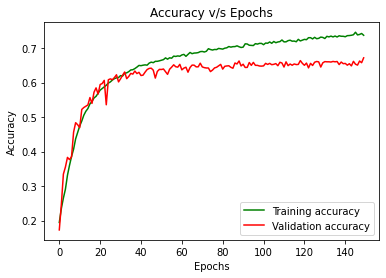

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val=  history.history['val_accuracy']
plt.plot( accuracy_train, 'g', label='Training accuracy')
plt.plot( accuracy_val, 'r', label='Validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

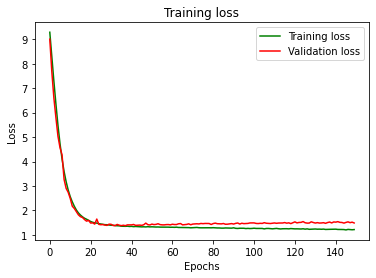

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot( loss_train, 'g', label = 'Training loss' )
plt.plot( loss_val, 'r', label = 'Validation loss' )
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(valid_dataset, verbose=1)

90/90 [==============================] - 11s 117ms/step - loss: 1.4849 - accuracy: 0.6718


[1.4849108457565308, 0.6718341708183289]

In [ ]:
model.evaluate(test_dataset, verbose=1)

113/113 [==============================] - 1560s 14s/step - loss: 1.4732 - accuracy: 0.6775


[1.4732149839401245, 0.677486777305603]

In [ ]:
predictions = model.predict(test_dataset, verbose=1)

113/113 [==============================] - 13s 114ms/step


In [ ]:
for i in predictions:
  print (i)

Streaming output truncated to the last 5000 lines.
[1.2419898e-02 4.2057320e-05 1.5413071e-02 2.4846357e-03 9.3694091e-01
 3.2389093e-02 3.1026342e-04]
[2.5129807e-03 4.4725828e-05 2.5004193e-03 9.0345734e-01 3.7242677e-02
 4.1797757e-03 5.0062090e-02]
[0.41242304 0.03308744 0.06318384 0.00292316 0.21481027 0.27307856
 0.00049371]
[0.17405292 0.02642691 0.09765962 0.0008464  0.01894121 0.6806263
 0.00144668]
[1.7662086e-03 9.6292264e-05 9.5536268e-01 6.0479229e-05 9.0782729e-04
 4.1389853e-02 4.1657925e-04]
[2.7430587e-02 3.1155878e-04 4.9314905e-02 1.3440874e-01 1.4489279e-02
 6.1623701e-03 7.6788253e-01]
[2.1252037e-05 1.0824201e-05 3.5142897e-05 8.4649295e-01 1.5259457e-01
 1.2900509e-04 7.1632810e-04]
[0.12275253 0.00159095 0.19443353 0.00139878 0.24114968 0.08052093
 0.35815367]
[4.4123355e-02 2.1523323e-03 7.1831219e-02 1.5803445e-02 5.7601593e-02
 8.0831212e-01 1.7591930e-04]
[6.9380510e-01 2.3307421e-03 4.7975931e-02 4.7079971e-05 5.0362758e-02
 2.0524219e-01 2.3628601e-04]
[0.